# Section 4.7 Practical Lecture Material 3

This page contains simulations of Practical Lecture Material 3: Complexity-performance trade-off in spectral clustering with sparse kernel.

## Contents

    - Spectra of uniformly "punctured" kernel matrices
    - Behavior of isolated eigenvector of $K$

## Spectra of uniformly "punctured" kernel matrices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg
pi = np.pi

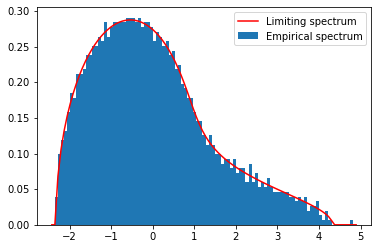

In [11]:
coeff = 2
p = 256*coeff
n = 1024*coeff
c = p/n

mu = np.concatenate([[1],np.zeros(p-1)])
j  = np.concatenate([-np.ones(n//2),np.ones(n//2)])

Z = np.random.randn(p,n)
X = Z + np.outer(mu,j)

B_eps = 0.5

B = (np.random.rand(n,n)<B_eps)*1.0
B = np.triu(B) + (np.triu(B)).T
B = B - np.diag(np.diag(B))
b = 0

K = (X.T@X/p)*B
eigs_K = np.linalg.eig(K)[0]
edges  = np.linspace(np.min(eigs_K)-.1,np.max(eigs_K)+.1,100)

y  = 1e-5
zs = edges+y*1j
dens = np.zeros(len(zs))

m=0
for index,z in enumerate(zs):
    m_tmp=-1
    while np.abs(m-m_tmp)>1e-6:
        m_tmp=m
        m = 1/( -z + b - m*B_eps/c + B_eps**3*m**2/c/(c+B_eps*m) )

    dens[index]=np.imag(m)/pi

plt.hist(eigs_K,bins=edges,weights=1/(edges[1]-edges[0])/n*np.ones(len(eigs_K)), label='Empirical spectrum')
plt.plot(edges,dens,'r', label='Limiting spectrum')
_ = plt.legend()

## Behavior of isolated eigenvector of $K$

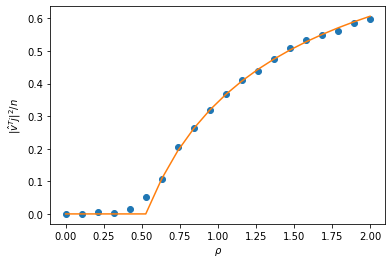

In [35]:
coeff = 2
p = 256*coeff
n = 1024*coeff
c = p/n

mu = np.concatenate([[1],np.zeros(p-1)])
j  = np.concatenate([-np.ones(n//2),np.ones(n//2)])

B_eps = 0.5

nb_average_loop  = 10
rho_range = np.linspace(0,2,20)

store_align = np.zeros( (len(rho_range),nb_average_loop) )
theo_align  = np.zeros(len(rho_range))

for index,rho in enumerate(rho_range):

    mu = np.concatenate([[np.sqrt(rho)],np.zeros(p-1)])
    for average_loop in range(nb_average_loop):
        Z = np.random.randn(p,n)
        X = Z + np.outer(mu,j)
        
        B = (np.random.rand(n,n)<B_eps)*1.0
        B = np.triu(B) + (np.triu(B)).T
        B = B - np.diag(np.diag(B))
        b = 0

        K = (X.T@X/p)*B
        hat_v = scipy.sparse.linalg.eigs(K,1,which='LR')[1].reshape(n)

        if j@hat_v <0:
            hat_v = -hat_v

        store_align[index,average_loop] = np.abs(j@hat_v)**2/n


    F_coeff = [1, 2, 1-c/B_eps, -2*c, -c]
    F = lambda x : np.polyval(F_coeff,x)
    solu = np.roots(F_coeff)
    real_solu = np.real(solu[np.abs(np.imag(solu))<1e-4])
    Gamma = max(real_solu)

    if rho>Gamma:
        theo_align[index] = F(rho)/rho/(1+rho)**3
    else:
        theo_align[index] = 0

plt.plot(rho_range, np.mean(store_align,1),'o')
plt.plot(rho_range, theo_align)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$|\hat{v}^T j|^2/n$')
_ = plt.show